⚠️ File not found locally, please upload city_day_cleaned.csv


Saving city_day_cleaned.csv to city_day_cleaned.csv
Dataset loaded: (29531, 21)


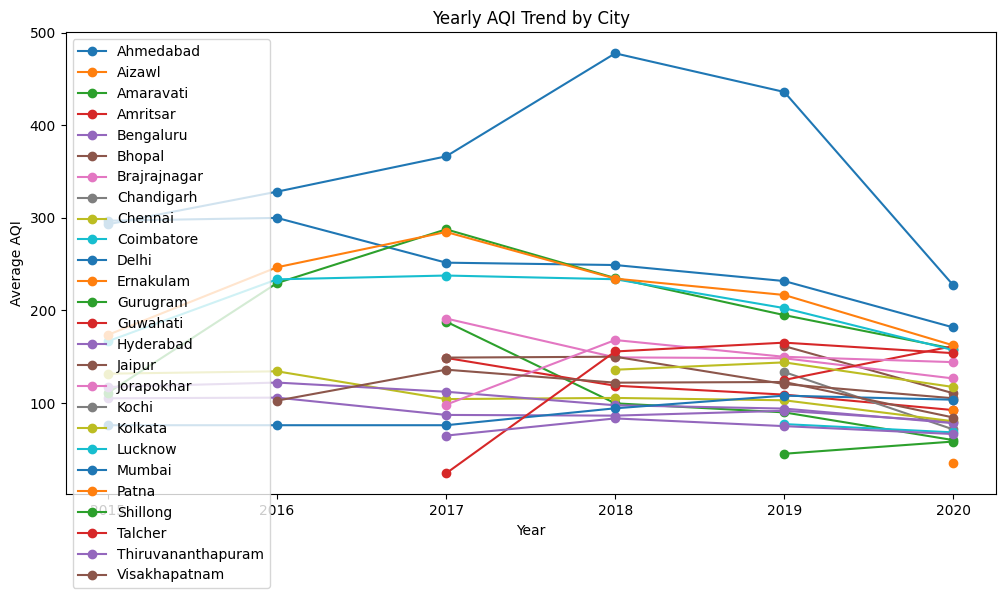

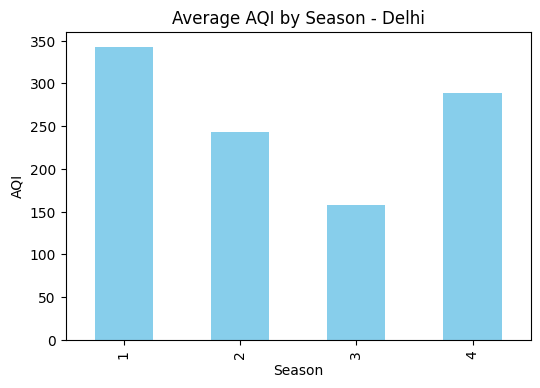

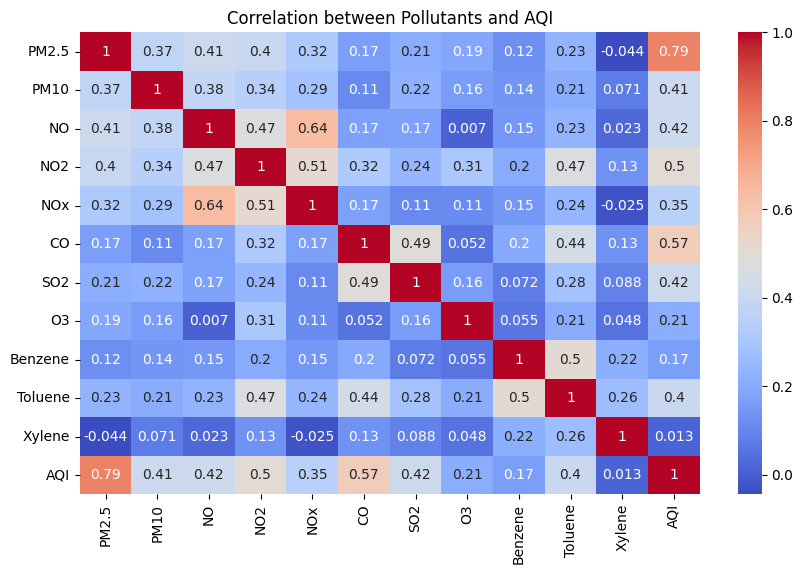


⚠️ Alerts Summary:
              City  AQI_Category  Count
0        Ahmedabad          Good      1
1        Ahmedabad      Moderate    250
2        Ahmedabad          Poor    255
3        Ahmedabad  Satisfactory     45
4        Ahmedabad        Severe    669
..             ...           ...    ...
125  Visakhapatnam          Good     60
126  Visakhapatnam      Moderate    827
127  Visakhapatnam          Poor     79
128  Visakhapatnam  Satisfactory    478
129  Visakhapatnam     Very Poor     18

[130 rows x 3 columns]


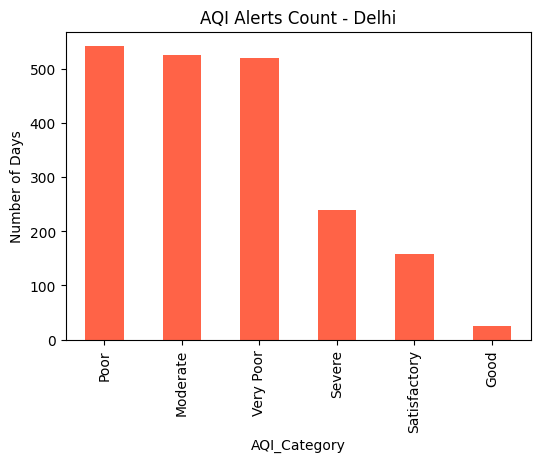


✅ Alerts & trend data saved as alerts_trend_data.csv


In [1]:
# ===========================================
# Milestone 3: Alerts & Trend Analysis
# AirAware - Smart AQI Prediction System
# ===========================================

# Step 1: Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Preprocessed Data (from Milestone 1)
csv_path = "../Milestone1/city_day_cleaned.csv"

if os.path.exists(csv_path):
    print("✅ Found dataset in Milestone1 folder")
    df = pd.read_csv(csv_path)
else:
    print("⚠️ File not found locally, please upload city_day_cleaned.csv")
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv("city_day_cleaned.csv")

df["Date"] = pd.to_datetime(df["Date"])

print("Dataset loaded:", df.shape)
df.head()

# ===========================================
# Trend Analysis
# ===========================================

# 1. Yearly Average AQI Trend (City-wise)
yearly_trend = df.groupby(["Year","City"])["AQI"].mean().reset_index()

plt.figure(figsize=(12,6))
for city in df["City"].unique():
    city_data = yearly_trend[yearly_trend["City"] == city]
    plt.plot(city_data["Year"], city_data["AQI"], marker="o", label=city)

plt.title("Yearly AQI Trend by City")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.legend()
plt.show()

# 2. Seasonal AQI Trend (for one city, e.g., Delhi)
city = "Delhi"
seasonal_trend = df[df["City"] == city].groupby("Season")["AQI"].mean()

plt.figure(figsize=(6,4))
seasonal_trend.plot(kind="bar", color="skyblue")
plt.title(f"Average AQI by Season - {city}")
plt.ylabel("AQI")
plt.show()

# 3. Pollutant Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[["PM2.5","PM10","NO","NO2","NOx","CO","SO2","O3","Benzene","Toluene","Xylene","AQI"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation between Pollutants and AQI")
plt.show()

# ===========================================
# Alerts for Hazardous AQI
# ===========================================

# Define thresholds (AQI standard levels)
def classify_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

df["AQI_Category"] = df["AQI"].apply(classify_aqi)

# Count of alerts per city
alerts = df.groupby(["City","AQI_Category"]).size().reset_index(name="Count")
print("\n⚠️ Alerts Summary:")
print(alerts)

# Plot alerts for one city (Delhi)
delhi_alerts = df[df["City"] == "Delhi"]["AQI_Category"].value_counts()

plt.figure(figsize=(6,4))
delhi_alerts.plot(kind="bar", color="tomato")
plt.title("AQI Alerts Count - Delhi")
plt.ylabel("Number of Days")
plt.show()

# ===========================================
# Save Processed Alerts Data
# ===========================================
df.to_csv("alerts_trend_data.csv", index=False)
print("\n✅ Alerts & trend data saved as alerts_trend_data.csv")
